# Decision trees with scikit

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import statistics
import matplotlib.pyplot as plt
import joblib

## Monk 1

In [2]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk1_tr = pd.read_csv("./dataset/monk1/monks-1.train", sep = " ", skipinitialspace=True, names = colnames)
monk1_tr = monk1_tr.drop('id', axis = 1)

monk1_ts = pd.read_csv("./dataset/monk1/monks-1.test", sep = " ", skipinitialspace=True, names = colnames)
monk1_ts = monk1_ts.drop('id', axis = 1)

In [3]:
x_monk1_tr = monk1_tr.iloc[:, 1:7].values
y_monk1_tr = monk1_tr.iloc[:, 0].values

x_monk1_ts = monk1_ts.iloc[:, 1:7].values
y_monk1_ts = monk1_ts.iloc[:, 0].values

In [4]:
one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk1_tr)
x_monk1_tr = one_hot_encoder_tr.transform(x_monk1_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk1_ts)
x_monk1_ts = one_hot_encoder_ts.transform(x_monk1_ts)

x_monk1_tr, y_monk1_tr = shuffle(x_monk1_tr, y_monk1_tr)
x_monk1_ts, y_monk1_ts = shuffle(x_monk1_ts, y_monk1_ts)

In [5]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_monk1_tr, y_monk1_tr, test_size = 0.25)

In [6]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, 0.05, 0.01, 0.005, 0.001],
              'max_depth' : np.arange(4, 15, 1),
              'criterion' :['gini', 'entropy']
             }


dt = tree.DecisionTreeClassifier()

grid = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)


grid.fit(x_monk1_tr, y_monk1_tr)
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 330 candidates, totalling 1650 fits
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=auto;, score=0.680 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=auto;, score=0.480 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=auto;, score=0.480 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=auto;, score=0.480 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=auto;, score=0.500 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=sqrt;, score=0.480 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=sqrt;, score=0.720 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=sqrt;, score=0.720 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=sq

[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_depth=5, max_features=log2;, score=0.500 total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_depth=6, max_features=auto;, score=0.480 total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_depth=6, max_features=auto;, score=0.480 total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_depth=6, max_features=auto;, score=0.720 total time=   0.0s
[CV 4/5] END ccp_alpha=0.05, criterion=gini, max_depth=6, max_features=auto;, score=0.960 total time=   0.0s
[CV 5/5] END ccp_alpha=0.05, criterion=gini, max_depth=6, max_features=auto;, score=0.792 total time=   0.0s
[CV 1/5] END ccp_alpha=0.05, criterion=gini, max_depth=6, max_features=sqrt;, score=0.680 total time=   0.0s
[CV 2/5] END ccp_alpha=0.05, criterion=gini, max_depth=6, max_features=sqrt;, score=0.480 total time=   0.0s
[CV 3/5] END ccp_alpha=0.05, criterion=gini, max_depth=6, max_features=sqrt;, score=0.960 total time=   0.0s
[CV 4/5] END ccp_al

[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=auto;, score=0.800 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=auto;, score=0.958 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt;, score=1.000 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt;, score=0.840 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt;, score=0.840 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt;, score=0.640 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=sqrt;, score=0.875 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=log2;, score=1.000 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=7, max_features=log2;, score=0.800 total time=   0.0s
[CV 3/5] END ccp_al

[CV 1/5] END ccp_alpha=0.005, criterion=gini, max_depth=9, max_features=auto;, score=0.640 total time=   0.0s
[CV 2/5] END ccp_alpha=0.005, criterion=gini, max_depth=9, max_features=auto;, score=0.800 total time=   0.0s
[CV 3/5] END ccp_alpha=0.005, criterion=gini, max_depth=9, max_features=auto;, score=0.720 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=gini, max_depth=9, max_features=auto;, score=0.800 total time=   0.0s
[CV 5/5] END ccp_alpha=0.005, criterion=gini, max_depth=9, max_features=auto;, score=0.583 total time=   0.0s
[CV 1/5] END ccp_alpha=0.005, criterion=gini, max_depth=9, max_features=sqrt;, score=0.760 total time=   0.0s
[CV 2/5] END ccp_alpha=0.005, criterion=gini, max_depth=9, max_features=sqrt;, score=0.880 total time=   0.0s
[CV 3/5] END ccp_alpha=0.005, criterion=gini, max_depth=9, max_features=sqrt;, score=0.760 total time=   0.0s
[CV 4/5] END ccp_alpha=0.005, criterion=gini, max_depth=9, max_features=sqrt;, score=0.560 total time=   0.0s
[CV 5/5] E

[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=11, max_features=auto;, score=0.720 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=11, max_features=auto;, score=0.800 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=11, max_features=auto;, score=0.792 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=11, max_features=sqrt;, score=0.800 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=11, max_features=sqrt;, score=0.720 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=11, max_features=sqrt;, score=0.800 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=11, max_features=sqrt;, score=0.520 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=11, max_features=sqrt;, score=0.792 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=11, max_features=log2;, score=0.800 total time=   0.0s
[

In [7]:
dt = grid.best_estimator_

train_pred = dt.predict(x_monk1_tr)
test_pred = dt.predict(x_monk1_ts)

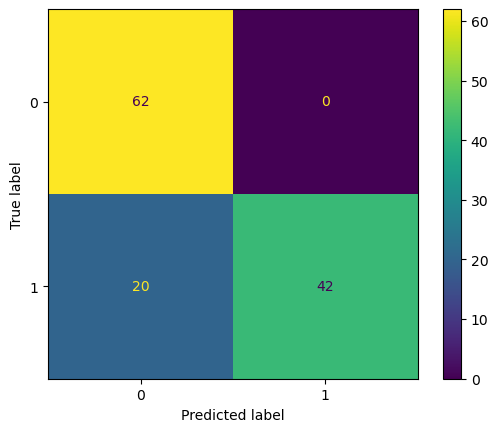

In [9]:
predictions = dt.predict(x_monk1_tr)

cm = confusion_matrix(y_monk1_tr, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [12]:
joblib.dump(dt, './results/monk1/DT/dt_monk1.z')

['./results/monk1/DT/dt_monk1.z']

## Model assesstment

In [13]:
dt_monk1 = joblib.load('./results/monk1/DT/dt_monk1.z')

In [14]:
score1 = dt_monk1.score(x_monk1_ts, y_monk1_ts)

In [15]:
print("Final accuracy on the test set: " + str(score1))

Final accuracy on the test set: 0.8240740740740741


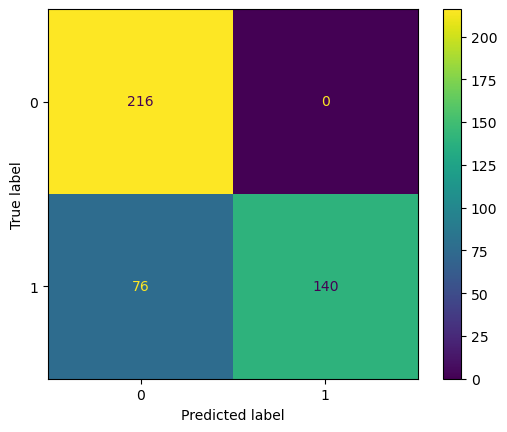

In [16]:
predictions = dt_monk1.predict(x_monk1_ts)

cm = confusion_matrix(y_monk1_ts, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()